<a href="https://colab.research.google.com/github/Rafael-Salomao/Analise_de_Dados_Airbnb_-_Dublin/blob/main/Data_Prep_%2B_Feature_Selection_Predi%C3%A7%C3%A3o_de_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes Database

**Descrição:** Preveja a ocorrência de diabetes em mulheres de ascendência Pima com base em certas medidas diagnósticas.

**Link:** [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
datapath = f'/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Tarefa Semana 6 - Feature Selection/diabetes.csv'

df00 = pd.read_csv(datapath, sep = ',')

df00.shape

(768, 9)

In [ ]:
df00.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df00.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Metadados

In [ ]:
# Criar variável para metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
metadata_df = generate_metadata(df00)

Retiro Target e Outras Colunas da Tabela

In [ ]:
lista_spec = ['Outcome']

df01 = df00.drop(axis=1,columns = lista_spec)
df01.shape

(768, 8)

Tratamento de Nulos

Retirar variáveis com >70% nulos

In [ ]:
# Variáveis numéricas
# Filtrando o DataFrame
missing_cutoff = 70
df_numericas_drop_nulos = metadata_df[(metadata_df['percent_nulos'] >= missing_cutoff)]
lista_drop_nulos_numericas = list(df_numericas_drop_nulos.nome_variavel.values)
lista_drop_nulos_numericas

[]

Substituir VAR_NUM pela média

Substituir VAR_CAT por "desconhecido".

<Axes: >

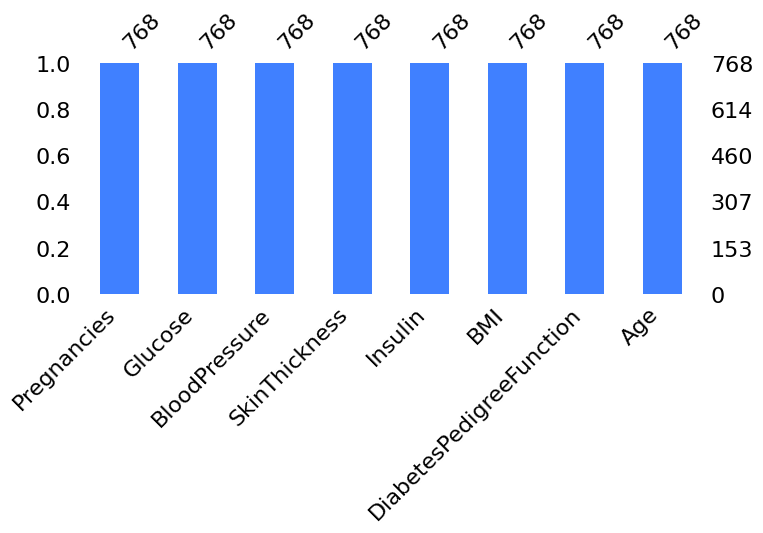

In [ ]:
import missingno as msno

msno.bar(df02, color=(0.25, 0.5, 1), figsize=(8, 3))  # tom de azul claro

Padronização

In [ ]:
df02 = df01.copy()

In [ ]:
# Foi escolhida  a Normalização mas poderia ser a Padronização
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Selecionando colunas numéricas
numeric_cols = df02.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
df02[numeric_cols] = scaler.fit_transform(df02[numeric_cols])
df02.shape

(768, 8)

In [ ]:
df02.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


OneHot Encoding

In [ ]:
df03 = df02.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

card_cutoff = 2
df_categ_onehot = metadata_df[(metadata_df['cardinalidade'] <= card_cutoff) & (metadata_df['tipo'] == 'object')]
lista_onehot = list(df_categ_onehot.nome_variavel.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(df03[lista_onehot])

# Criando um DataFrame com as colunas codificadas, mantendo o índice original
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df02.index)

# Concatenando o DataFrame codificado com o DataFrame original
df03 = pd.concat([df03.drop(lista_onehot, axis=1), encoded_df], axis=1)

df03.head()

Lista de vars para OneHot Encoding:  []


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Label Encoding

In [ ]:
df04 = df03.copy()

In [ ]:
df_categ_labelenc = metadata_df[(metadata_df['cardinalidade'] > card_cutoff) & (metadata_df['tipo'] == 'object')]
lista_vars_abt = list(df03.columns)
lista_lenc = list(df_categ_labelenc.nome_variavel.values)

for item in lista_drop_nulos_numericas:
    if item in lista_lenc:
        lista_lenc.remove(item)

print('Lista de vars para Label Encoding: ',lista_lenc)

Lista de vars para Label Encoding:  []


Incluo Target de volta na tabela

In [ ]:
# Inner join usando o índice
df_model = pd.merge(df03, df00[['Outcome']], left_index=True, right_index=True, how='inner')
df_model.shape

(768, 9)

In [ ]:
df_model.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Feature Selection

Feature Importance

In [ ]:
df_model_00 = df_model.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

X = df_model_00.drop(axis=1,columns='Outcome')
y = df_model_00.Outcome

# Treinar modelo com algoritmo Random Forest (Calma, não precisa focar no modelo neste momento)
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.5

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
selected_features

['Glucose', 'BMI', 'Age']

Visualizar a Importancia das Variáveis Graficamente

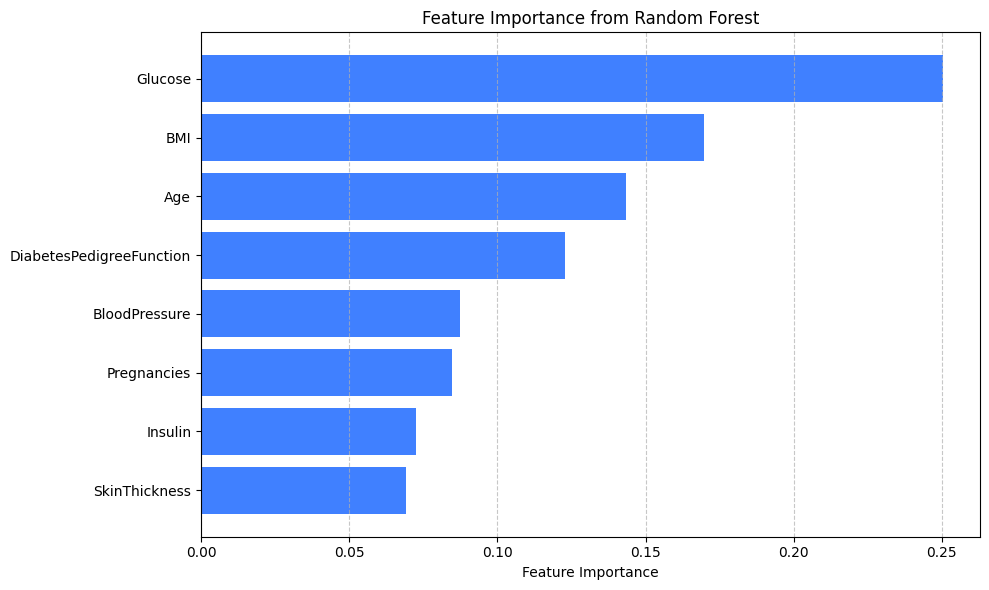

In [ ]:
# Visualizando a importância das variáveis em barras horizontais

plt.figure(figsize=(10, 6))
sorted_idx = feature_importances.argsort()

plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color=(0.25, 0.5, 1))  # tom de azul claro
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Manter Apenas VAR Selecionadas

In [ ]:
def discretize_numeric_features(df, bins):
    df_discretized = df.copy()
    for col in df.columns:
        if df[col].dtype in ['float64', 'float32', 'int64', 'int32'] and len(df[col].unique()) > bins:
            df_discretized[col] = pd.cut(df[col], bins=bins, labels=False, duplicates='drop')
    return df_discretized

def calculate_iv(df, feature, target):
    lst = []
    for value in df[feature].unique():
        lst.append({
            'Value': value,
            'All': df[df[feature] == value].count()[feature],
            'Good': df[(df[feature] == value) & (df[target] == 1)].count()[feature],
            'Bad': df[(df[feature] == value) & (df[target] == 0)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = (dset['Good'] + 0.0001) / (dset['Good'].sum() + 0.0001)  # Adding a small value to avoid division by zero
    dset['Distr_Bad'] = (dset['Bad'] + 0.0001) / (dset['Bad'].sum() + 0.0001)  # Adding a small value to avoid division by zero
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad']).replace({np.inf: 0, -np.inf: 0})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    return dset['IV'].sum()

def classify_iv(iv_value):
    if iv_value < 0.02:
        return "Muito Fraco"
    elif iv_value < 0.1:
        return "Fraco"
    elif iv_value < 0.3:
        return "Moderado"
    elif iv_value < 0.5:
        return "Forte"
    else:
        return "Muito Forte"

def select_features_by_iv_discretized(df, target, iv_cutoff_ratio=1.0, bins=10):
    from tqdm import tqdm
    df = discretize_numeric_features(df, bins)

    iv_stats = []
    for col in tqdm(df.columns, desc="Calculating IV", unit="variable"):
        if col != target:
            iv_value = calculate_iv(df, col, target)
            iv_stats.append({
                'Variable': col,
                'IV': iv_value,
                'Predictiveness': classify_iv(iv_value)
            })

    iv_df = pd.DataFrame(iv_stats).sort_values(by='IV', ascending=False)
    max_iv = iv_df['IV'].max()
    cutoff_value = iv_cutoff_ratio * max_iv
    selected_features = iv_df[iv_df['IV'] >= cutoff_value]['Variable'].tolist()

    return selected_features, iv_df

In [ ]:
# Testing the function using a binarized version of the iris dataset
selected_vars_iv, iv_data = select_features_by_iv_discretized(df_model_00, 'Outcome', iv_cutoff_ratio=0.25, bins=10)
selected_vars_iv

Calculating IV: 100%|██████████| 9/9 [00:00<00:00, 28.71variable/s]


['Glucose', 'BMI', 'Age', 'Pregnancies']

In [ ]:
iv_data

,Variable,IV,Predictiveness
1,Glucose,1.404180,Muito Forte
5,BMI,0.905234,Muito Forte
7,Age,0.528999,Muito Forte
0,Pregnancies,0.403164,Forte
3,SkinThickness,0.296142,Moderado
6,DiabetesPedigreeFunction,0.256140,Moderado
4,Insulin,0.242123,Moderado
2,BloodPressure,0.178866,Moderado


Seleção de Variáveis por Information Value (Target Binário)

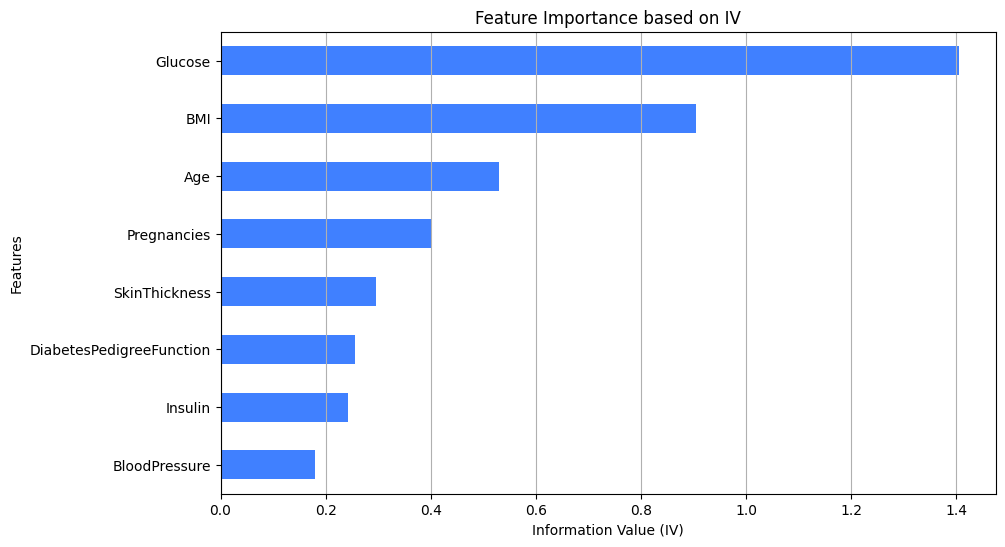

In [ ]:
import matplotlib.pyplot as plt

def plot_iv(df_iv_data):
    plt.figure(figsize=(10, 6))
    df_iv_data.sort_values('IV').set_index('Variable')['IV'].plot(kind='barh', color=(0.25, 0.5, 1))
    plt.xlabel('Information Value (IV)')
    plt.ylabel('Features')
    plt.title('Feature Importance based on IV')
    plt.grid(axis='x')
    plt.show()

plot_iv(iv_data)